# Project 2: Ames Housing Price Model

## Problem Statement

Housing prices have skyrocketed to all time highs in most recent years, is that a good thing? What is causing this and why? Are we destined to repeat the 2007 housing market crash? Or is it different this time around?

We wish to look at the factors driving these record home prices to see if they are caused by short term inputs such as the current state of interest rates or even the price of lumber. We will decide on our investments based on future prediction of these home prices

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as linear_model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV,  RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification

In [2]:
#Load data
train= pd.read_csv('./datasets/train.csv')
test= pd.read_csv('./datasets/test.csv')

In [3]:
#Data cleaning; Initial check + organize columns

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [6]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [7]:
test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

In [8]:
train.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [9]:
test.isna().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [10]:
train.shape

(2051, 81)

In [11]:
test.shape

(878, 80)

In [12]:
##fill NA
##borrowed function from stack overflow
def fill_na(data):
    for col in data:
        if data[col].dtypes == object:
            data[col].replace(np.nan, 'NA', inplace=True)
        elif (data[col].dtypes == int) | (data[col].dtypes == float):
            data[col].replace(np.nan, 0, inplace=True)

In [13]:
fill_na(train)
fill_na(test)

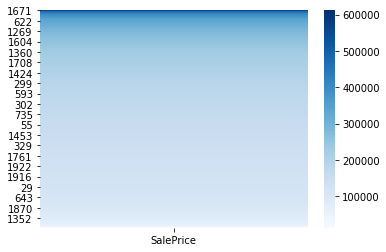

In [14]:
# # create heatmap of top correlations
sns.heatmap(train[['SalePrice']].sort_values('SalePrice', ascending=False)
, cmap='Blues');

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     2051 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            2051 non-null   object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     878 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            878 non-null    object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [17]:
#Binarize columns // do they have central AC/driveway/pool
train['Central Air']= train['Central Air'].replace(['Y','N'], [1,0])
train['Paved Drive']= train['Paved Drive'].replace(['Y','N'], [1,0])
train['Pool QC']= train['Pool QC'].replace(['NA', 'Po','Fa','TA','Gd', 'Ex'], [0, 1, 1, 1, 1, 1])
test['Central Air']= test['Central Air'].replace(['Y','N'], [1,0])
test['Paved Drive']= test['Paved Drive'].replace(['Y','N'], [1,0])
test['Pool QC']= test['Pool QC'].replace(['NA', 'Po','Fa','TA','Gd', 'Ex'], [0, 1, 1, 1, 1, 1])


In [18]:
#organize columns
num_train= train._get_numeric_data().columns
num_test= test._get_numeric_data().columns

In [19]:
num_train

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Pool QC', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object')

In [20]:
#changed to try and fit model... NOT WORKING! :(
nom_train= [x for x in train.columns if (x not in num_train) and (x != 'SalePrice')]
nom_test= [x for x in train.columns if x not in num_train and (x != 'SalePrice')]

In [21]:
nom_train

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Misc Feature',
 'Sale Type']

In [22]:
train_corr = train.corr()['SalePrice']
train_corr.dtypes

dtype('float64')

In [23]:
#graph
train_corr.sort_values()

PID               -0.255052
Enclosed Porch    -0.135656
Kitchen AbvGr     -0.125444
Overall Cond      -0.097019
MS SubClass       -0.087335
Id                -0.051398
Bsmt Half Bath    -0.045290
Low Qual Fin SF   -0.041594
Yr Sold           -0.015203
Misc Val          -0.007375
BsmtFin SF 2       0.016432
Pool Area          0.023106
Pool QC            0.024366
Mo Sold            0.032735
3Ssn Porch         0.048732
Screen Porch       0.134581
Bedroom AbvGr      0.137067
Lot Frontage       0.181456
Bsmt Unf SF        0.190861
2nd Flr SF         0.248452
Garage Yr Blt      0.258645
Central Air        0.277378
Half Bath          0.283001
Bsmt Full Bath     0.283332
Lot Area           0.296566
Wood Deck SF       0.326490
Open Porch SF      0.333476
BsmtFin SF 1       0.423856
Fireplaces         0.471093
Mas Vnr Area       0.503579
TotRms AbvGrd      0.504014
Full Bath          0.537969
Year Remod/Add     0.550370
Year Built         0.571849
1st Flr SF         0.618486
Total Bsmt SF      0

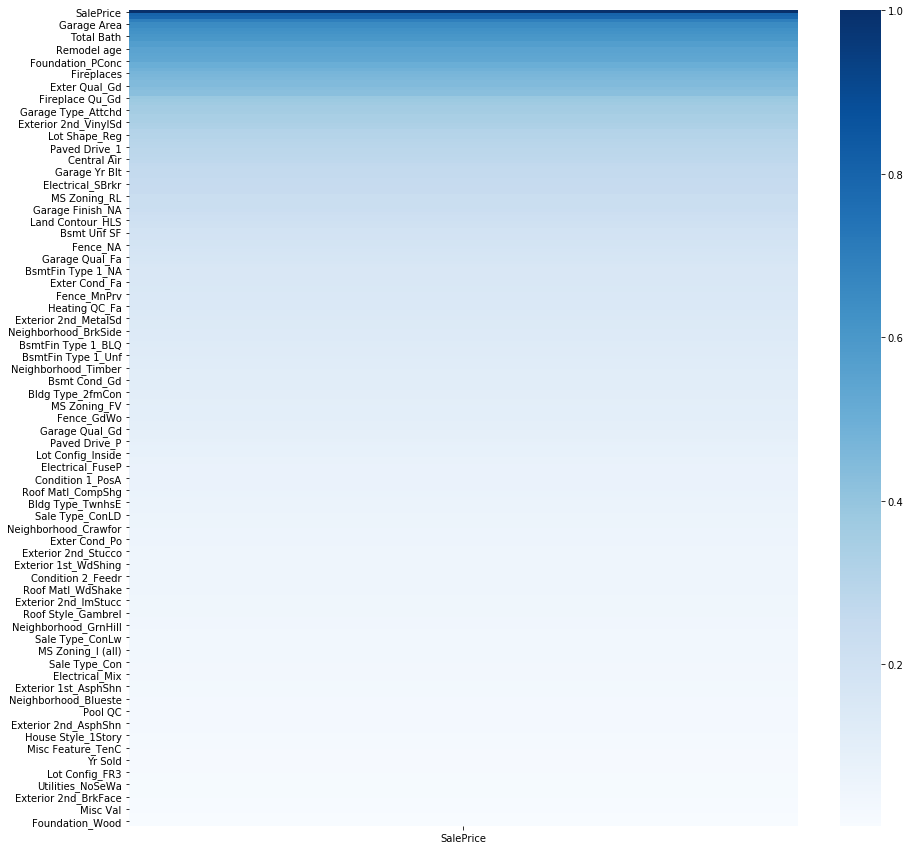

In [63]:
# # create heatmap of top correlations
plt.figure(figsize =(15, 15))
sns.heatmap(np.abs(train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False), cmap='Blues');

In [64]:
train.shape

(2051, 266)

In [65]:
# # #feature engineering
train['Age']= train['Yr Sold'] - train['Year Built']
train['Remodel age']= train['Yr Sold'] - train['Year Remod/Add']
train['Total Bath']= train['Bsmt Full Bath'] + train['Bsmt Half Bath'] + train['Full Bath'] + train['Half Bath']
train['Total Sq Ft']= train['Total Bsmt SF']+ train['1st Flr SF'] + train['2nd Flr SF']
test['Total Bath']= test['Bsmt Full Bath'] + test['Bsmt Half Bath'] + test['Full Bath'] + test['Half Bath']
test['Total Sq Ft']= test['Total Bsmt SF']+ test['1st Flr SF'] + test['2nd Flr SF']
test['Age']= test['Yr Sold'] - test['Year Built']
test['Remodel age']= test['Yr Sold'] - test['Year Remod/Add']

In [66]:
train.shape

(2051, 266)

In [67]:
test.shape

(878, 249)

In [32]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
SalePrice         int64
Age               int64
Remodel age       int64
Total Bath      float64
Total Sq Ft     float64
Length: 85, dtype: object

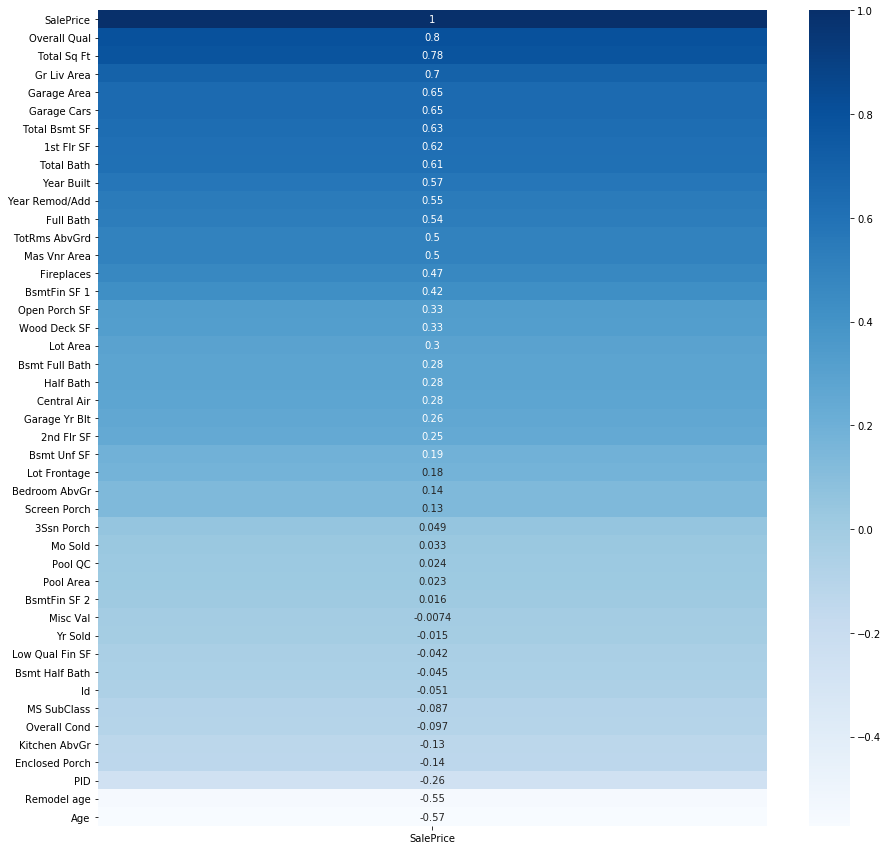

In [33]:
plt.figure(figsize =(15, 15))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice',  ascending=False), annot=True, cmap='Blues');

In [34]:
train.shape

(2051, 85)

In [35]:
test.shape

(878, 84)

In [36]:
train= pd.get_dummies(train, columns= nom_train, drop_first=True)
test= pd.get_dummies(test, columns= nom_test ,drop_first=True)

In [37]:
train.shape

(2051, 266)

In [38]:
test.shape

(878, 249)

In [39]:
#Model
#drop neg correlated
features= train.drop(['SalePrice', 'Id', 'PID', 'PID','Enclosed Porch','Kitchen AbvGr','Overall Cond','MS SubClass','Id','Bsmt Half Bath','Low Qual Fin SF','Yr Sold','Misc Val'], axis=1)
X= features._get_numeric_data()
y= train['SalePrice']

In [40]:
X.shape

(2051, 255)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 266 entries, Id to Sale Type_WD 
dtypes: float64(13), int64(32), uint8(221)
memory usage: 1.1 MB


In [42]:
y.shape

(2051,)

In [43]:
X.dtypes

Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Year Built           int64
Year Remod/Add       int64
                    ...   
Sale Type_ConLI      uint8
Sale Type_ConLw      uint8
Sale Type_New        uint8
Sale Type_Oth        uint8
Sale Type_WD         uint8
Length: 255, dtype: object

In [44]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [45]:
# Scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [46]:
#from class // need to rerun
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas= l_alphas,
                  cv = 5,
                  max_iter=5000,
                   tol=0.0015
                  )

# Fit model using best ridge alpha!
lasso_cv.fit(X_train, y_train)

/home/andrew/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44650589195.68158, tolerance: 8200005329.274841
  tol, rng, random, positive)
/home/andrew/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10840495764.92978, tolerance: 8200005329.274841
  tol, rng, random, positive)
/home/andrew/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67545950055.52045, tolerance: 7613810524.758753
  tol, rng, random, positive)
/home/andrew/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Obje

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0015,
        verbose=False)

In [47]:
#optimal value of alpha
lasso_cv.alpha_

1.0

In [48]:
lasso_cv.score(X_train, y_train)

0.9485322197096736

In [49]:
#Instantiate Linear Regression
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lr.score(X_train, y_train)

0.9485363655080258

In [51]:
## Generate predictions
train_preds = lr.predict(X_train)

In [52]:
## Generate predictions
test_preds  = lr.predict(X_test)

In [53]:
## MSE for training
mean_squared_error(y_true=y_train, y_pred = train_preds)

330093569.2859294

In [54]:
## MSE for testing
mean_squared_error(y_true=y_test, y_pred = test_preds)

9.430238312358692e+29

In [55]:
## RMSE for training 
mean_squared_error(y_true=y_train, y_pred = train_preds)**0.5

18168.47735188421

In [56]:
## RMSE for testing
mean_squared_error(y_true=y_test, y_pred = test_preds)**0.5

971094141283876.4

In [57]:
## Baseline predictions
baseline_train_preds = [y_train.mean()]*len(y_train)
baseline_test_preds  = [y_train.mean()]*len(y_test)

In [58]:
## Baseline RMSE training
mean_squared_error(y_true = y_train, y_pred = baseline_train_preds)**0.5

80088.1579510141

In [59]:
## Baseline RMSE testing
mean_squared_error(y_true = y_test, y_pred = baseline_test_preds)**0.5

78395.61503831799

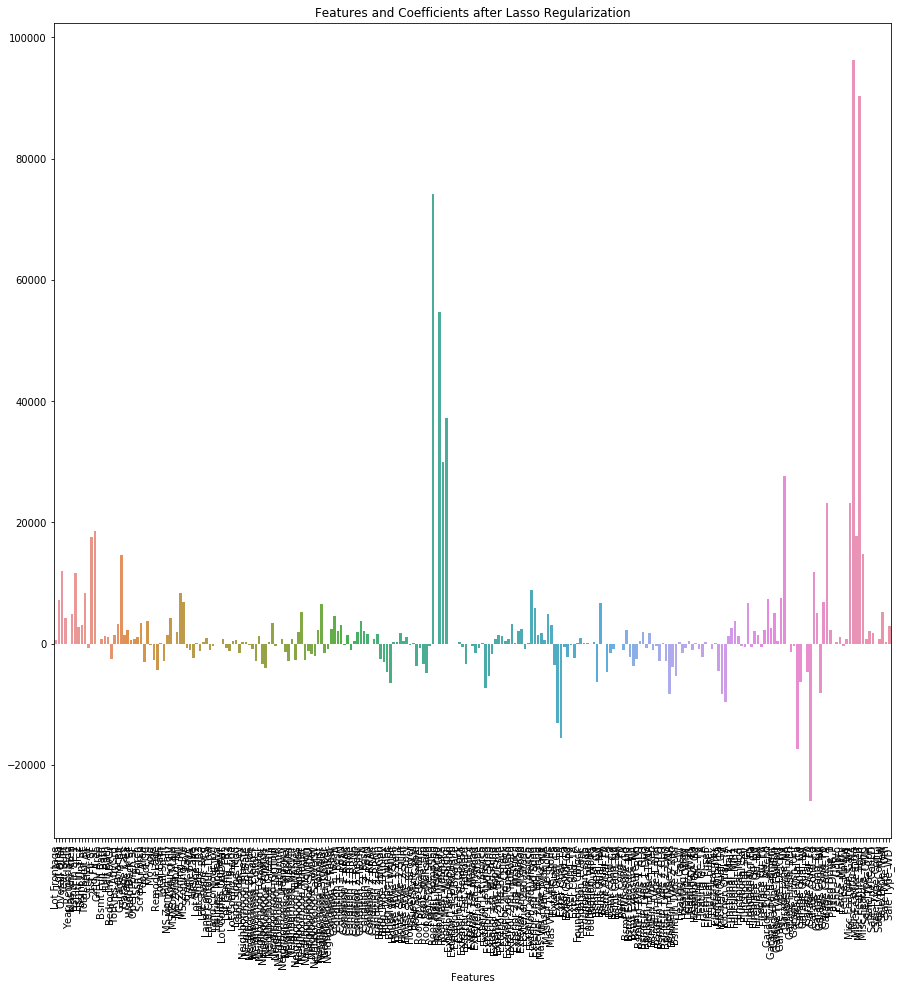

In [85]:
plt.figure(figsize = (15,15))

y=lasso_cv.coef_

ax = sns.barplot(X.columns , y)
ax.set_title('Features and Coefficients after Lasso Regularization')
ax.set_xlabel('Features')
ax.set_xticklabels(features, rotation=90);

In [87]:
## Look at coefficients
lr.coef_
lasso_cv.coef_
## Make coef dataframe
coef_df = pd.DataFrame({
    'column_name': X.columns,
    'coef'       : lr.coef_,
    'lasso_coef' : lasso_cv.coef_
})

coef_df.sort_values(by='column_name')

,column_name,coef,lasso_coef
11,1st Flr SF,-4.818011e+15,17642.962236
12,2nd Flr SF,-4.972406e+15,18623.716703
25,3Ssn Porch,1.118531e+03,1126.001033
30,Age,-2.017055e+16,-2623.048059
41,Alley_NA,-1.110500e+03,-1066.510550
...,...,...,...
49,Utilities_NoSeWa,-5.775196e+14,0.000000
50,Utilities_NoSewr,-5.936021e+14,0.000000
23,Wood Deck SF,5.687500e+02,571.646561
3,Year Built,-2.017156e+16,4233.143041


In [61]:
#Kaggle submission

In [62]:
submission = pd.DataFrame(y, columns=['SalePrice'])
submission['Id'] = test['Id']
submission = submission[['Id', 'SalePrice']]
submission.to_csv('submission', index=False)

## Conclusions and Recommendations

Based on our analyzed data findings, we can determine and test the factors most likely to impact the Sales Price. Square footage(total), number rooms/bathrooms, upgraded amenities, quality and add-ons such as AC, Garages and fireplaces have shown to have the most significant impact. 

Normal predictors for home prices show the market is being impacted by other external factors. Factors such as tax cuts, recent stimuli, limited supply and the pandemic have exacerbated the underlying issue. While these factors differ from the 2007-8 Housing crash, similarities are obvious…. But more research is needed.